# Importar libreria requeridas

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# NLTK 
import nltk
from nltk.tokenize import wordpunct_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#nltk.download()
nltk.download('omw-1.4')
nltk.download('stopwords')

# data visual
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# string proccessing
import re
import string


[nltk_data] Downloading package omw-1.4 to /home/raul/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/raul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#%pip install re

# Leer dataset

In [3]:
## Leer df
path = 'data/youtoxic_english_1000.csv'
df = pd.read_csv(path)
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\r\nDont you reckon them 'black lives matter' ...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


# EDA

<AxesSubplot: xlabel='IsToxic', ylabel='count'>

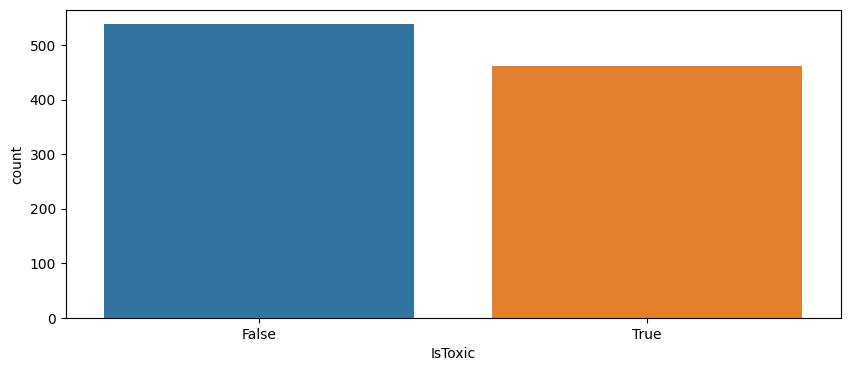

In [4]:
plt.figure(figsize=(10,4))
sns.countplot(x="IsToxic", data=df)

## Preprocesamiento de los datos

### Palabras y caracteres más repetidos de la columna comentarios del dataset

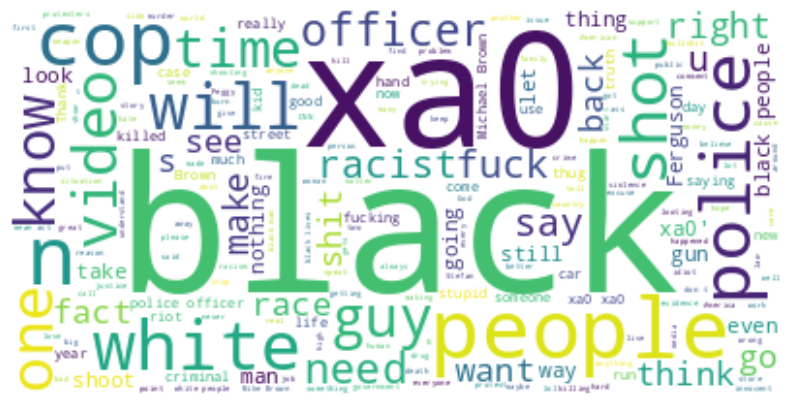

In [5]:
text = df['Text'].values 

wordcloud = WordCloud(background_color="white").generate(str(text))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
stopwords = set(stopwords.words('english')) - set(['i', 'he', 'she', 'you', 'me', 'we', 'us',
                                                   'this', 'them', 'that', 'those', 'her', 'his'])

### Lematizacion

In [7]:
wnl = WordNetLemmatizer()

In [8]:
def lem_n(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token)
        a.append(lemmetized_word)
    return a

def lem_v(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token, pos='v')
        a.append(lemmetized_word)
    return a

def lem_a(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token,pos='a')
        a.append(lemmetized_word)
    return a

def lem_r(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token, pos='r')
        a.append(lemmetized_word)
    return a

def lem_s(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token,pos='s')
        a.append(lemmetized_word)
    return a

### Expresiones regulares

In [9]:
def apply_re(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub('(\\\\u([a-z]|[0-9])+)', ' ', text)
    text = re.sub(r'https|http?:\/\/\S+', '', text)
    return text


In [10]:
def join_words(text):
    return ' '.join(text)

In [11]:
def lower_words(text):
    return text.lower()

## Procesado y limpieza del texto. Salida en tokens para formar el corpus

In [12]:
wnl = WordNetLemmatizer()
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df['Text'] = df['Text'].apply(apply_re)
df['Text'] = df['Text'].apply(lower_words)
df['Text'] = df['Text'].apply(word_tokenize)
df['Text'] = df['Text'].apply(lem_n)
df['Text'] = df['Text'].apply(lem_v)
df['Text'] = df['Text'].apply(lem_r)
df['Text'] = df['Text'].apply(lem_a)
df['Text'] = df['Text'].apply(lem_s)
df['Text'] = df['Text'].apply(join_words)

In [13]:
print(df['Text'])

0      if people would take step back make this case ...
1      law enforcement train shoot apprehend they tra...
2      dont you reckon them black life matter banner ...
3      there large number people like police officer ...
4      the arab dude absolutely right he shoot 6 extr...
                             ...                        
995                i remember that send national defence
996    stats dont represent problem race bait attitud...
997     the quote mother wow that hit hard very accurate
998                                    this video racist
999                              god narrator annoy lisp
Name: Text, Length: 1000, dtype: object


### Tokens mas repetidos, una vez limpiado y procesado

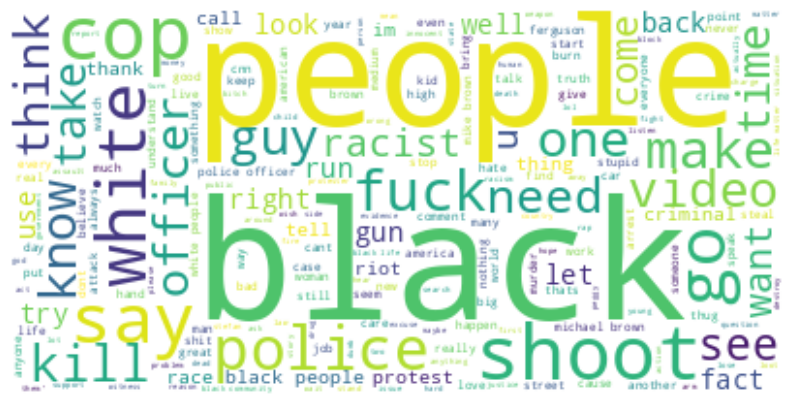

In [14]:
text = df['Text'].values 

wordcloud = WordCloud(background_color="white").generate(str(text))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Procesamiento: vectorización

In [15]:
#sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

### Mezcla aleatoria de los registros del dataframe

In [16]:
## Hipotesis: mezclamos el df por sesgos humanos a la hora de insertar registros o comentarios que son
## sugestionados por el sig o ant comentario
#df = shuffle(df, random_state = 42)
df

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,if people would take step back make this case ...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,law enforcement train shoot apprehend they tra...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,dont you reckon them black life matter banner ...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,there large number people like police officer ...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,the arab dude absolutely right he shoot 6 extr...,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,i remember that send national defence,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,stats dont represent problem race bait attitud...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,the quote mother wow that hit hard very accurate,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video racist,False,False,False,False,False,False,False,False,False,False,False,False


### Vectorizacion: ajuste y escalado/normalizacion de los tokens

In [17]:
# Inicializacion de constructores de las 2 técnicas de vectorizacion: CountVectorizer() y TfidfTransformer()
vectorizer = CountVectorizer()
tfid = TfidfTransformer()
XGB_model = XGBClassifier(max_depth = 50, min_child_weight = 10, eta = 1, objective = 'binary:logistic', colsample_bytree=0.6, subsample=0.7, 
 n_estimators=300, eval_metric='auc', early_stopping_rounds=10)
#Log_reg = LogisticRegression(verbose=True)
CBT_model = CatBoostClassifier(iterations=1000, learning_rate=0.001, loss_function='Logloss', eval_metric='AUC') # use_best_model params will make the model prevent overfitting)

In [18]:
#Ajuste y escalado (normalizacion). Finalmente Pasamos a array nuestro vectores a nuestro modelo
text_vector = vectorizer.fit_transform(df['Text']).toarray()
text_vector = tfid.fit_transform(text_vector).toarray()

In [19]:
# No funciona de otra manera si no convierto de bool a int64
df['IsToxic'][df['IsToxic']==False] = 0
df['IsToxic'][df['IsToxic']==True] = 1
df['IsToxic'] = df['IsToxic'].astype(dtype=int)
print(df['IsToxic'])

0      0
1      1
2      1
3      0
4      0
      ..
995    0
996    1
997    0
998    0
999    0
Name: IsToxic, Length: 1000, dtype: int64


/tmp/ipykernel_19642/3614751492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsToxic'][df['IsToxic']==False] = 0


In [20]:
y = df['IsToxic']

# Entrenar modelo

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], y, test_size=0.2, random_state=42)

In [22]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', CatBoostClassifier(iterations=1000, learning_rate=0.001, loss_function='Logloss', eval_metric='AUC')),  # train on TF-IDF vectors w/ CatBoost classifier. Use_best_model params will make the model prevent overfitting
])

In [23]:
bow_transformer = CountVectorizer().fit(df['Text'])

print(len(bow_transformer.vocabulary_))

3771


### Ajustamos y entrenamos con Catboost

In [24]:
pipeline.fit(X_train, y_train, classifier__early_stopping_rounds=5, classifier__verbose=False)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x7fdb9d49a920>)])

### Ajustamos y entrenamos con XGBoost

In [25]:
#XGB_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

### Predecimos con nuestro modelos. Evaluamos con métricas

In [26]:
#pred = Log_reg.predict(X_test)
y_pred_CBT = pipeline.predict(X_test)
#y_pred_XGB= XGB_model.predict(X_test)

In [27]:
print(y_pred_CBT.dtype)
#print(y_pred_XGB.dtype)
#print(y_train)



int64


In [28]:
'''
# Si hago aqui la mapeo de string a bool tengo overfitting y peores metricas (CURIOSO)
## No funciona de otra manera si no convierto de bool int64
y_pred[y_pred =='False'] = False
y_pred[y_pred =='True'] = True
print(y_pred.dtype)
y_pred = y_pred.astype(dtype=bool)
print(y_pred.dtype)
'''

"\n# Si hago aqui la mapeo de string a bool tengo overfitting y peores metricas (CURIOSO)\n## No funciona de otra manera si no convierto de bool int64\ny_pred[y_pred =='False'] = False\ny_pred[y_pred =='True'] = True\nprint(y_pred.dtype)\ny_pred = y_pred.astype(dtype=bool)\nprint(y_pred.dtype)\n"

In [29]:
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)
#print(y_pred)

### Métricas

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy del modelo
acc = accuracy_score(y_test, y_pred_CBT)
# Overfitting
pred_train = pipeline.predict(X_train)
y_pred_train = pred_train.astype(dtype=bool)
acc_train= accuracy_score(y_train, y_pred_train)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_CBT)

print("++++CBT model+++")
print(f"Accuaracy: {acc}")
print(f"Accuaracy_train: {acc_train}")

print(classification_report(y_test, y_pred_CBT))

++++CBT model+++
Accuaracy: 0.645
Accuaracy_train: 0.71875
              precision    recall  f1-score   support

           0       0.57      0.96      0.71        93
           1       0.91      0.37      0.53       107

    accuracy                           0.65       200
   macro avg       0.74      0.67      0.62       200
weighted avg       0.75      0.65      0.62       200



from sklearn.model_selection import RandomizedSearchCV

'''
objective= 'binary:logistic',
nthread=4,
learning_rate=0.3, 
max_depth=6, 
n_estimators=100,
subsample=0.8
'''
estimator = XGBClassifier(objective= 'binary:logistic')

tuned_parameters = {
    'max_depth':[3,4,5,6],
    'min_child_weight':[1,2,3,4,5,6],
    'gamma':[i/10.0 for i in range(0,5)], 
    'learning_rate':[0.01,0.05,0.1,0.2]  #, 'n_estimators':[100, 500,1000]
}

grid_search = RandomizedSearchCV(
    estimator = estimator,
    param_distributions = tuned_parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=False
)

eval_set = [(X_train, y_train), (X_test, y_test)]
grid_search.fit(X_train, y_train,
                eval_metric = ['error', 'logloss'],   # error = 1 - accuracy
                early_stopping_rounds = 2,
                eval_set = eval_set, verbose = False)

print(" The best estimator across ALL searched params: ", grid_search.best_estimator_)
print(" The best score across ALL searched params: ", grid_search.best_score_)
print(" The best parameters across ALL searched params: ", grid_search.best_params_)
print(" The best scoring across ALL searched params: : ", grid_search.scoring)

# Guardamos el mejor modelo
modelo_XGB_hyper = grid_search.best_estimator_



In [33]:
'''
y_pred_XGB = modelo_XGB_hyper.predict(X_test)

# Accuracy del modelo
acc = accuracy_score(y_test, y_pred_XGB)
# Overfitting
pred_train = modelo_XGB_hyper.predict(X_train)
y_pred_train = pred_train.astype(dtype=bool)
acc_train= accuracy_score(y_train, y_pred_train)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_XGB)

print("++++XGB model+++")
print(f"Accuaracy: {acc}")
print(f"Accuaracy_train: {acc_train}")
print(cm)

print(classification_report(y_test, y_pred_XGB))
'''

'\ny_pred_XGB = modelo_XGB_hyper.predict(X_test)\n\n# Accuracy del modelo\nacc = accuracy_score(y_test, y_pred_XGB)\n# Overfitting\npred_train = modelo_XGB_hyper.predict(X_train)\ny_pred_train = pred_train.astype(dtype=bool)\nacc_train= accuracy_score(y_train, y_pred_train)\n\n# Confusion matrix\ncm = confusion_matrix(y_test, y_pred_XGB)\n\nprint("++++XGB model+++")\nprint(f"Accuaracy: {acc}")\nprint(f"Accuaracy_train: {acc_train}")\nprint(cm)\n\nprint(classification_report(y_test, y_pred_XGB))\n'

# Guardamos nuestro Bow y nuestro mejor modelo

In [34]:
import pickle

In [35]:
### Guardando diccionario BoW para usarlo mas tarde en la predicción
bow_path = 'BoW_HateSpeech_Model.pkl'
pickle.dump(text_vector, open(bow_path, "wb"))

In [36]:
pickle.dump(CBT_model, open('CBT_model', 'wb'))